In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

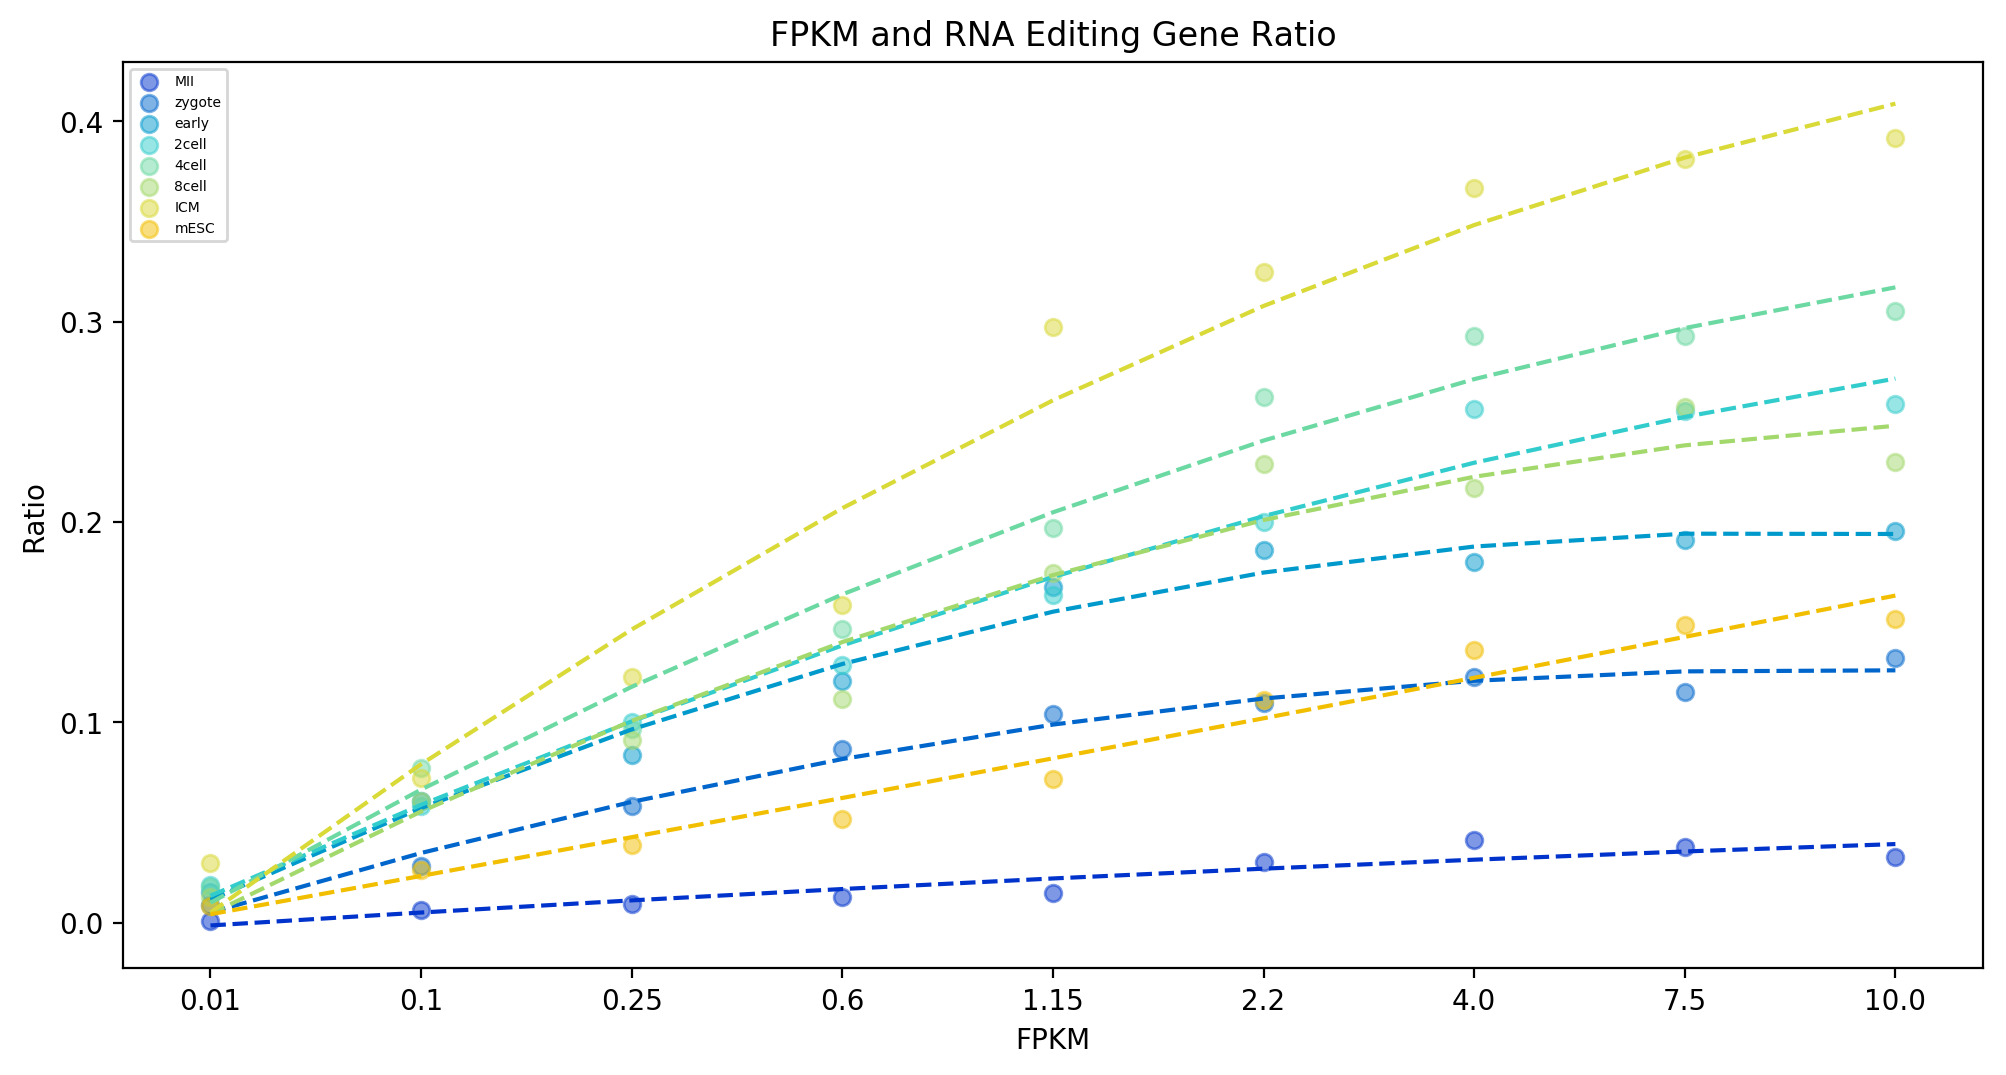

In [43]:
input = pd.read_csv('FPKMlowratio.csv', sep=',')
data = input.drop('Celllines', axis=1)
data2 = pd.DataFrame(data.values, index=input['Celllines'].values, columns=data.columns.values)

colorBar1 = [[0,0.2,0.8],[0.0,0.4,0.8],[0.0,0.6,0.8],[0.2,0.8,0.8],[0.425,0.85,0.6375],[0.6375,0.85,0.425],[0.85,0.85,0.22125],[0.95,0.75,0.0]]
plen = len(data2.columns.values)
celllines = data2.index.values
x = np.arange(1,plen+1,1)

#print(data2.loc['MII'].values)
plt.figure(figsize=(12, 6), dpi=200)
for i in range(len(celllines)):
    plt.scatter(x, data2.loc[celllines[i]].values, c=colorBar1[i], alpha=0.5, label=celllines[i])
    f1 = np.polyfit(x, data2.loc[celllines[i]].values, 2)
    yvals=np.polyval(f1, x)
    plt.plot(x, yvals, linestyle='--', c=colorBar1[i])
    

plt.title('FPKM and RNA Editing Gene Ratio')
plt.xticks([i for i in range(1, plen+1)], [round(float(i),4) for i in data2.columns.values] , rotation = 0) 
plt.xlabel('FPKM')
plt.ylabel('Ratio')
plt.legend(prop={'size':5})
plt.savefig('FPKMlowratio.png')




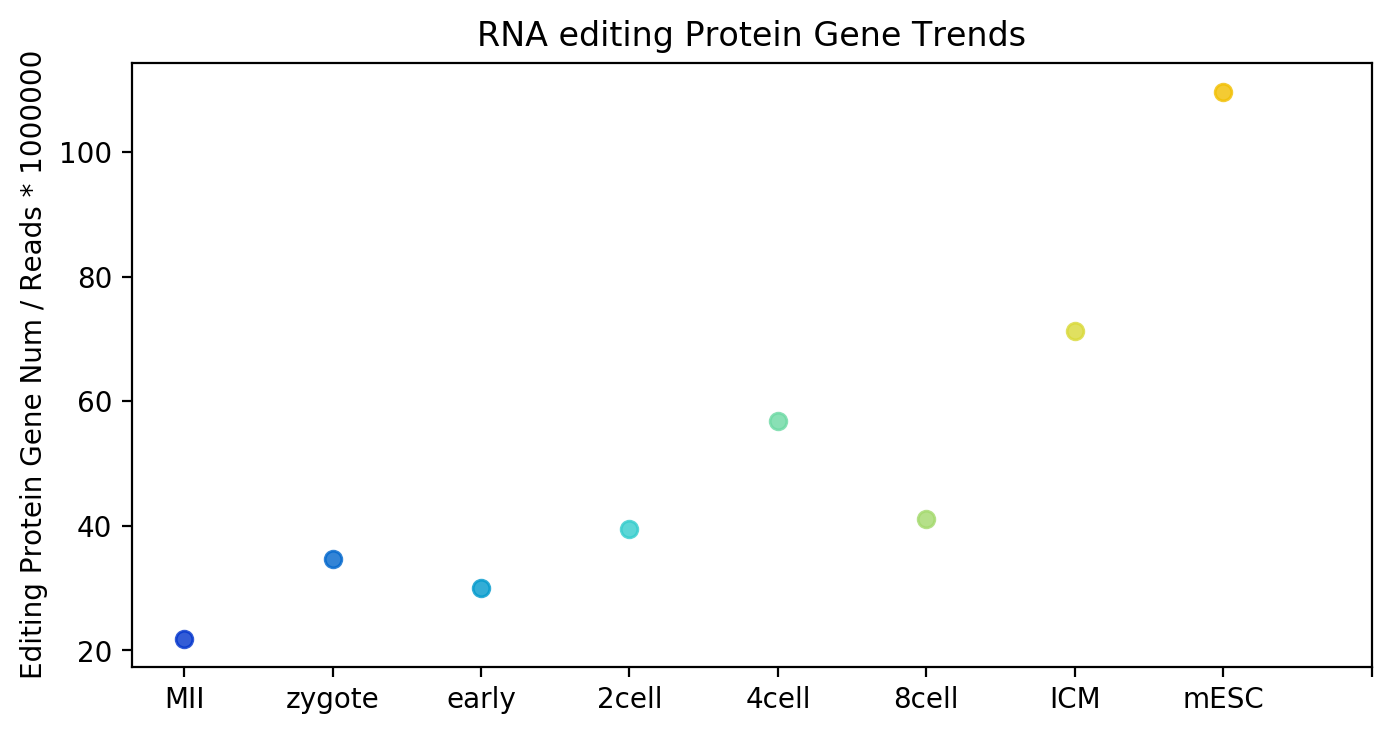

In [57]:
Single = [25.39009783,40.65064031,42.5103503,60.23935224,76.48012009,56.06070405,120.6810152,142.4722046]
Pool = [16.4,30.60625,34.41395349,45.91111111,58.80833333,42.87419355,84.05714286,116.05]
GIREMI = [6.360177523,9.585796048,8.403651474,21.98200166,18.17180115,12.92898546,16.75201114,19.80395384]
RNAEdit = [26.11111111,47.97619048,46.9625,63.33333333,88.55,60.54411765,121.0666667,128.3846154]
AllGene = [26.77777778,43.4047619,38.125,48.29487179,68.71666667,50.25,85.16666667,125.6923077]
ProteinGene = [21.83333333,34.71428571,29.975,39.53846154,56.85,41.04411765,71.23333333,109.6923077]
x = np.arange(1,9,1)
celllines = ['MII', 'zygote', 'early', '2cell', '4cell', '8cell', 'ICM', 'mESC']
plt.figure(figsize=(8, 4), dpi=200)
for i in range(len(celllines)):
    plt.scatter(x[i], ProteinGene[i], c=colorBar1[i], alpha=0.8, marker='o')
plt.title('RNA editing Protein Gene Trends')
plt.xticks([i for i in range(1, plen+1)],  celllines, rotation = 0) 
plt.ylabel('Editing Protein Gene Num / Reads * 1000000')
plt.savefig('ProteinGeneTrends.png')

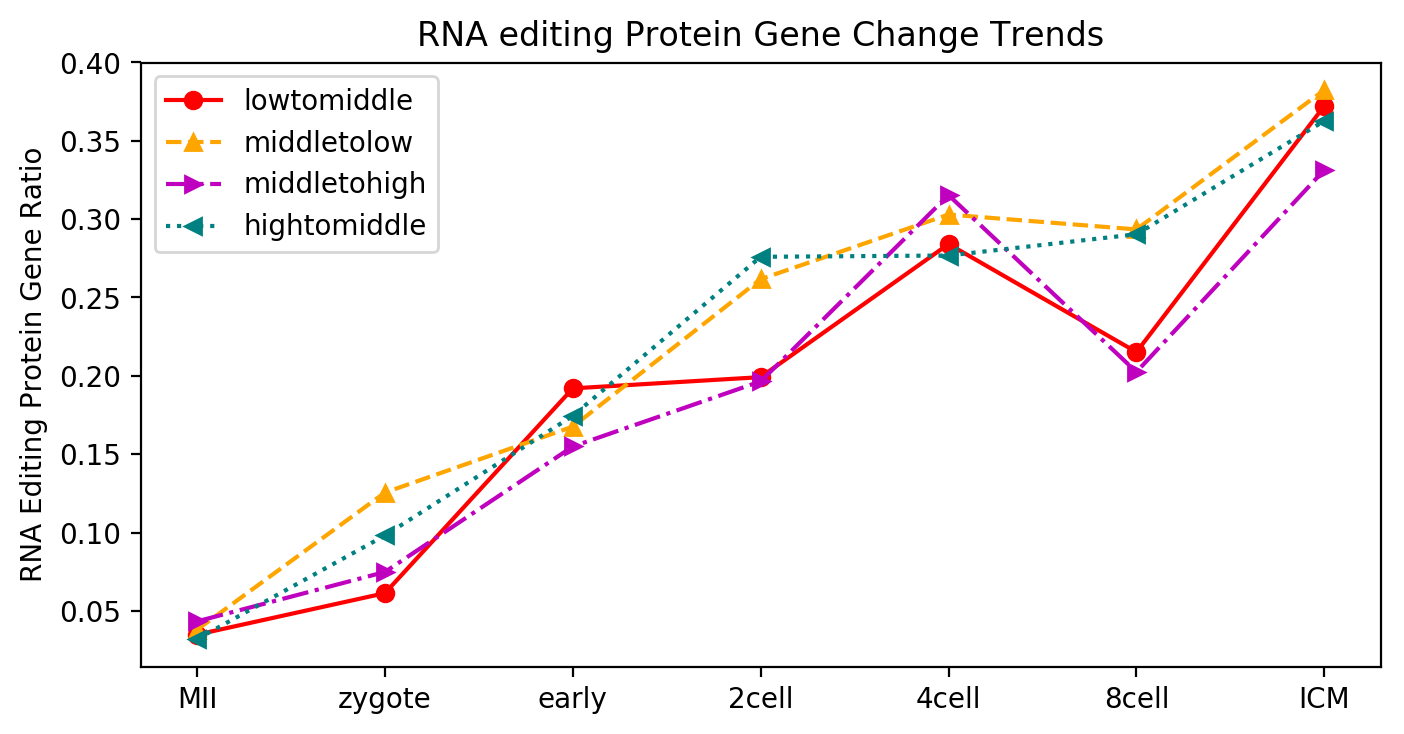

In [65]:
l2m = [0.034883721,0.061349693,0.192010309,0.199181446,0.284090909,0.215170279,0.372222222]
m2l = [0.038028169,0.125531915,0.167604049,0.261695906,0.30292599,0.293442623,0.382381413]
m2h = [0.043343653,0.07486631,0.154929577,0.196485623,0.315315315,0.202479339,0.331395349]
h2m = [0.032040472,0.098143236,0.174486804,0.275964392,0.276785714,0.290322581,0.362652233]
x = np.arange(1,8,1)
celllines = ['MII', 'zygote', 'early', '2cell', '4cell', '8cell', 'ICM']
plt.figure(figsize=(8, 4), dpi=200)
plt.plot(x, l2m, 'o-', c='red', label='lowtomiddle')
plt.plot(x, m2l, '^--', c='orange', label='middletolow')
plt.plot(x, m2h, '>-.', c='m', label='middletohigh')
plt.plot(x, h2m, '<:', c='teal', label='hightomiddle')
plt.title('RNA editing Protein Gene Change Trends')
plt.xticks([i for i in range(1, 8)],  celllines, rotation = 0) 
plt.ylabel('RNA Editing Protein Gene Ratio')
plt.legend()
plt.savefig('ChangeTrends.png')

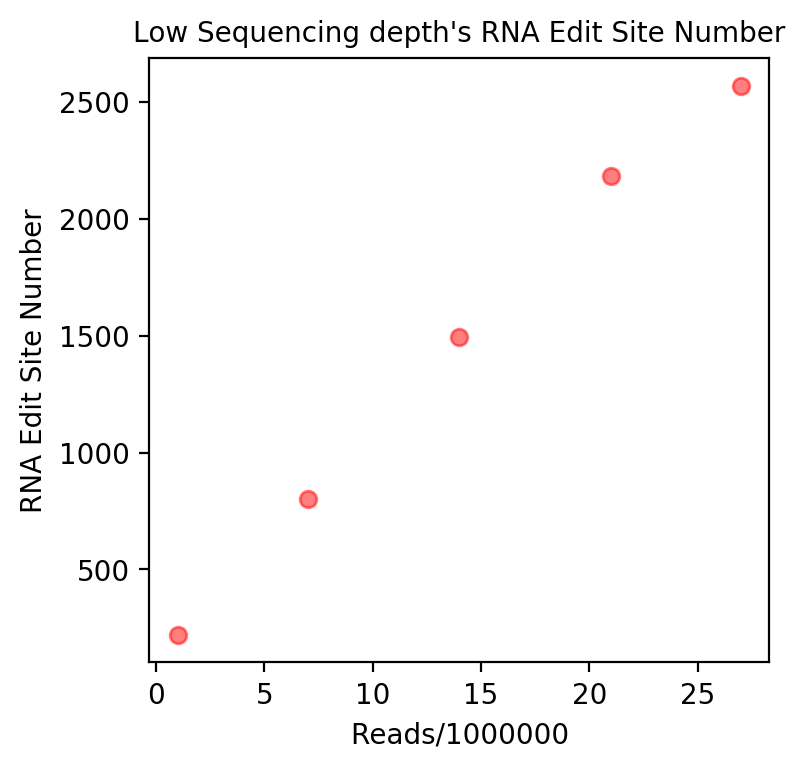

In [68]:
y = [219,800,1493,2186,2570]
x = [1,7,14,21,27]
plt.figure(figsize=(4, 4), dpi=200)
plt.scatter(x, y, c='r', alpha=0.5, marker='o')
plt.title('Low Sequencing depth\'s RNA Edit Site Number', fontsize=10)
plt.ylabel('RNA Edit Site Number')
plt.xlabel('Reads/1000000')
plt.savefig('lowdepth.png')

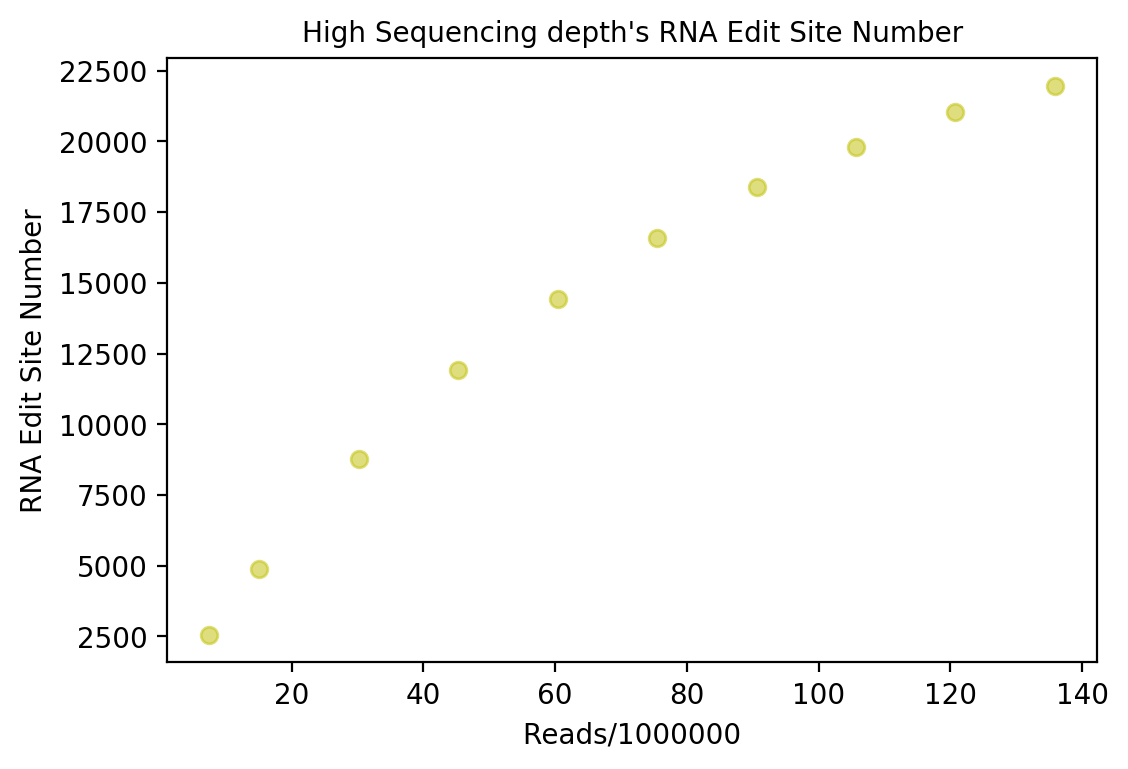

In [70]:
y = [2549,4891,8756,11915,14433,16575,18402,19821,21030,21966]
x = [7.54874005,15.0974801,30.1949602,45.2924403,60.3899204,75.4874005,90.5848806,105.6823607,120.7798408,135.8773209]
plt.figure(figsize=(6, 4), dpi=200)
plt.scatter(x, y, c='y', alpha=0.5, marker='o')
plt.title('High Sequencing depth\'s RNA Edit Site Number', fontsize=10)
plt.ylabel('RNA Edit Site Number')
plt.xlabel('Reads/1000000')
plt.savefig('highdepth.png')